## Line distortion

We'll start out by creating a star with the same steller parameters as before.

Note that like `Star` inherits from `Disk`, `Planet` inherits from `Star` (and thus also `Disk`).

/Users/emilkn/Library/CloudStorage/OneDrive-Chalmers/Desktop/postdoc/obscurae/src/obscurae/shadow.py:337: RuntimeWarning: divide by zero encountered in divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y
/Users/emilkn/Library/CloudStorage/OneDrive-Chalmers/Desktop/postdoc/obscurae/src/obscurae/shadow.py:337: RuntimeWarning: invalid value encountered in divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y


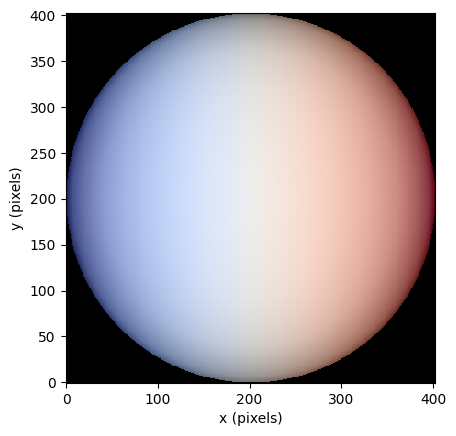

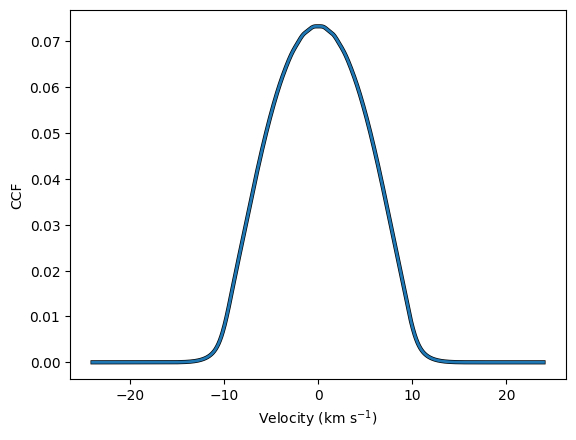

In [1]:
import obscurae as obsc
rp = 0.1 # planet-to-star radius ratio
planet = obsc.Planet(rp=rp,vsini=10.,zeta=3.0,xi=2.0,cs=[0.8,0.3])
planet.Grid()
planet.Line()
planet.starLight()
planet.starLine()

That looks familiar.

Now we'll make a planet traverse the disk. You could just supply the $(x,y)$ values in units of the stellar radii, like `xx=np.array([0.2,0.5,0.2])`, `yy=np.array([0.0,0.0,0.0])` for a planet transiting along the equator -- an aligned system.

We could also calculate $(x,y)$ given the orbital parameters using the `Dynamics` class as shown.

In [2]:
import numpy as np
## timestamps/observations
ts = np.array([-0.04,-0.025,-0.01,0.0,0.02,0.05])
## short-period orbit 
p = 2.0 #period in days
t0 = 0 #mid-transit time

## impact parameter of ~0.4
io = np.deg2rad(86) #orbital inclination in radians
a = 6 #semi-major axis in stellar radii

## circular orbit
e = 0.0 #eccentricity
w = np.deg2rad(90) #argument of periapse in radians
## aligned orbit
l = np.deg2rad(0) #projected spin-orbit angle/obliquity in radians

## calculate true anomaly, f, or rather cos(f) and sin(f)
cosf, sinf = obsc.Dynamics.trueAnomaly(ts,t0,e,p)
## from that calculate x,y positions on stellar disk
xx, yy = obsc.Dynamics.xyPos(cosf,sinf,e,w,a,io,l)


Let's first see how the planet should move across the disk.

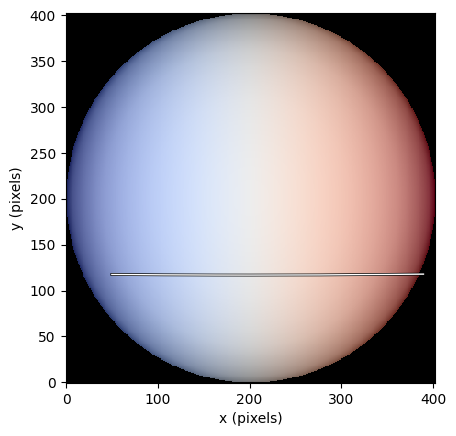

In [3]:
planet.transit(trace=(xx,yy))  #path followed by the planet

Then we'll occult part of the disk at times `ts`.

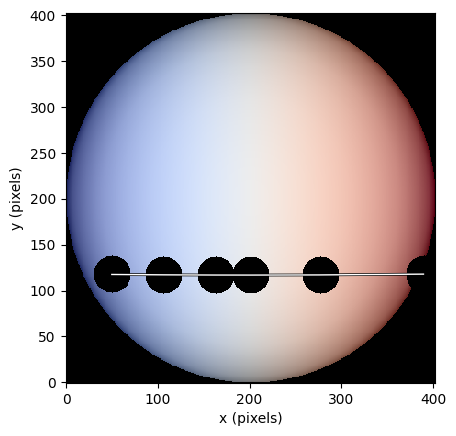

In [4]:
planet.Occult(xx,yy)
planet.transit(trace=(xx,yy)) #shows the trace of the planet at each timestamp

What we're really interested in is the distortion of the stellar line.

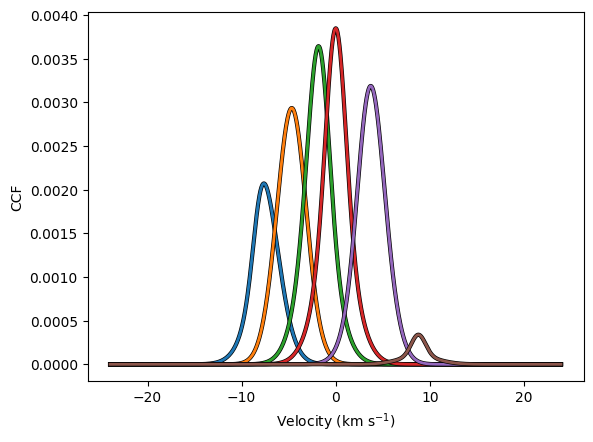

In [5]:
planet.distortLine()
planet.showLines()

You can see the location of a peak in velocity roughly corresponds to the $x$-value on the stellar disk (which goes from $-v \sin i$ to $v \sin i$).